In [203]:
# import necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
# read dataset
dataset = pd.read_csv('/content/drive/MyDrive/housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [207]:
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [208]:
dataset.shape

(20640, 10)

In [209]:
# check for missing values
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [210]:
# from sklearn.impute import SimpleImputer
# imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [211]:
# replace missing values with median
median_value = dataset['total_bedrooms'].median()
dataset['total_bedrooms'].fillna(median_value, inplace=True)

In [212]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [213]:
# confirm repalced values is applied
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [214]:
# print columns
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [215]:
# x = dataset.iloc[:,[1,2,3,4,5,6,7,9]].values
# y = dataset.ilo[:,-2:]

# also can use it this way so no need to rearrage columns

In [ ]:
# x = dataset.iloc[:,:11]
# x.drop('median_house_value', axis = 1, inplace = True)
# x = x.values
# y = dataset.iloc[:,8:9].values

In [216]:
# rearrange columns
df = dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity',
       'median_house_value']]

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [217]:
df['ocean_proximity'].nunique() # unique gives values nunique gives number of values

5

<Axes: xlabel='latitude', ylabel='longitude'>

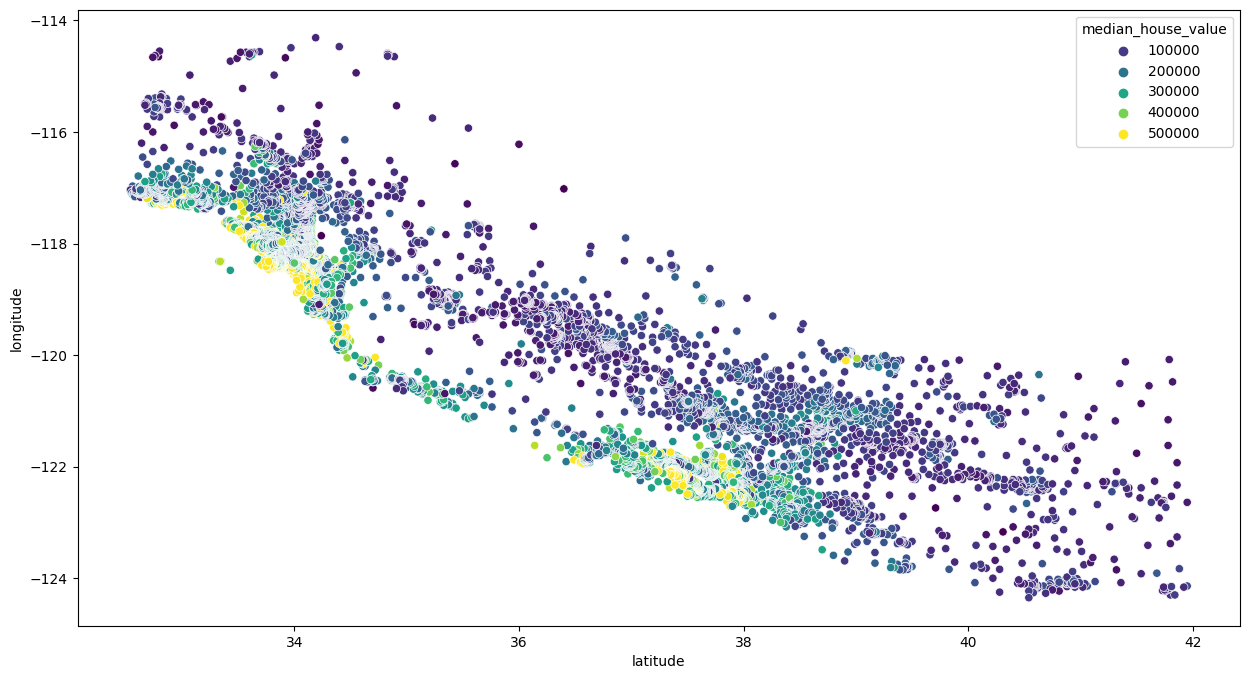

In [218]:
plt.figure(figsize = (15,8))
# sns.pairplot(data = df)
# df.hist()
# sns.heatmap(df.corr(), annot= True, cmap= 'PuOr')
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='viridis')

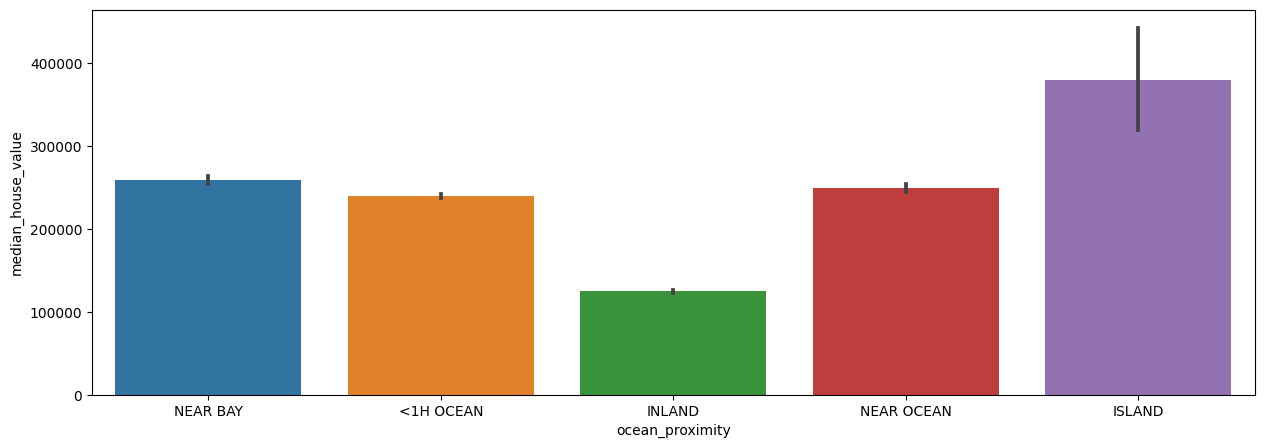

In [263]:
# ocean_proximity and median_house_price
plt.figure(figsize=(15,5))
sns.barplot(x = df['ocean_proximity'], y = df['median_house_value'])
plt.show()

In [219]:
# distinguish between independent and dependent values
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [220]:
# print arrays
(x,y)

(array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 'NEAR BAY'],
        [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 'NEAR BAY'],
        [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 'NEAR BAY'],
        ...,
        [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 'INLAND'],
        [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 'INLAND'],
        [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 'INLAND']], dtype=object),
 array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.]))

In [221]:
# transform categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [222]:
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[8])], remainder= 'passthrough')
x = column_transformer.fit_transform(x)

In [223]:
x

array([[0.0, 0.0, 0.0, ..., 322.0, 126.0, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401.0, 1138.0, 8.3014],
       [0.0, 0.0, 0.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007.0, 433.0, 1.7],
       [0.0, 1.0, 0.0, ..., 741.0, 349.0, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [226]:
y

array([3665, 3074, 3017, ...,  508,  432,  479])

In [227]:
# create train and test model
from sklearn.model_selection import train_test_split

In [228]:
# test_size is 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [229]:
# train and test arrays x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test


(array([[0.0, 1.0, 0.0, ..., 228.0, 65.0, 4.2386],
        [0.0, 0.0, 0.0, ..., 1485.0, 447.0, 4.3898],
        [1.0, 0.0, 0.0, ..., 1022.0, 368.0, 3.9333],
        ...,
        [0.0, 0.0, 0.0, ..., 704.0, 393.0, 3.1977],
        [1.0, 0.0, 0.0, ..., 1052.0, 468.0, 5.6315],
        [0.0, 1.0, 0.0, ..., 1024.0, 298.0, 1.3882]], dtype=object),
 array([[0.0, 0.0, 0.0, ..., 1551.0, 371.0, 4.1518],
        [1.0, 0.0, 0.0, ..., 1296.0, 429.0, 5.7796],
        [0.0, 1.0, 0.0, ..., 1554.0, 534.0, 4.3487],
        ...,
        [0.0, 1.0, 0.0, ..., 850.0, 326.0, 3.2027],
        [0.0, 1.0, 0.0, ..., 1072.0, 374.0, 6.1436],
        [1.0, 0.0, 0.0, ..., 1462.0, 406.0, 3.3326]], dtype=object),
 array([3841, 2270, 1545, ..., 2454, 3787,  279]),
 array([ 953, 1993, 1590, ...,  870, 2168, 1260]))

In [250]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [251]:
(x_train, x_test)

(array([[-0.89150581,  1.46934754, -0.01348032, ..., -1.04760128,
         -1.1356496 ,  0.19001247],
        [-0.89150581, -0.68057418, -0.01348032, ...,  0.05210918,
         -0.13688171,  0.26931072],
        [ 1.12169768, -0.68057418, -0.01348032, ..., -0.35295521,
         -0.34343319,  0.02989505],
        ...,
        [-0.89150581, -0.68057418, -0.01348032, ..., -0.63116359,
         -0.27806879, -0.35589721],
        [ 1.12169768, -0.68057418, -0.01348032, ..., -0.32670914,
         -0.08197562,  0.92053182],
        [-0.89150581,  1.46934754, -0.01348032, ..., -0.35120548,
         -0.52645348, -1.30490629]]),
 array([[-0.88975652, -0.68715544, -0.02201661, ...,  0.11511818,
         -0.33869458,  0.1622391 ],
        [ 1.12390297, -0.68715544, -0.02201661, ..., -0.11903497,
         -0.18674914,  1.03200015],
        [-0.88975652,  1.45527481, -0.02201661, ...,  0.11787292,
          0.08832451,  0.2674461 ],
        ...,
        [-0.88975652,  1.45527481, -0.02201661, ..., -

In [252]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train = standard_scaler.fit_transform(y_train)
y_test = standard_scaler.fit_transform(y_test)

In [253]:
(y_train, y_test)

(array([[ 2.18776584],
        [ 0.65726493],
        [-0.04904516],
        ...,
        [ 0.83652156],
        [ 2.13515791],
        [-1.28240872]]),
 array([[-0.61559049],
        [ 0.40752078],
        [ 0.01106516],
        ...,
        [-0.69724264],
        [ 0.57967893],
        [-0.31357591]]))

# **Regression**

In [264]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [265]:
y_pred = regression.predict(x_test)
y_pred

array([[ 1.07253934e+11],
       [-2.56748763e+07],
       [-1.99855351e+10],
       ...,
       [-1.99855351e+10],
       [-1.99855351e+10],
       [-2.56748770e+07]])

# **Artificial Neural Network(ANN)**

In [254]:
import tensorflow as tf

In [255]:
tf.__version__

'2.14.0'

In [256]:
# initialize ann

ann = tf.keras.models.Sequential()

In [257]:
# add a hidden layer

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [258]:
# add a second hidden layer

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [259]:
# add third hidden layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [260]:
# compile

ann.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

# **Training Dataset**

In [261]:
ann.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
516/516 [==============================] - 3s 3ms/step - loss: -1.6100 - accuracy: 0.0000e+00
Epoch 2/5
516/516 [==============================] - 1s 2ms/step - loss: -36.6099 - accuracy: 0.0000e+00
Epoch 3/5
516/516 [==============================] - 1s 2ms/step - loss: -160.2673 - accuracy: 0.0000e+00
Epoch 4/5
516/516 [==============================] - 1s 2ms/step - loss: -407.2952 - accuracy: 0.0000e+00
Epoch 5/5
516/516 [==============================] - 1s 2ms/step - loss: -797.4819 - accuracy: 0.0000e+00
